# [ 데이터 분석 최종 리포팅 과제 ]

- Seattle weather prediction
  - 시애틀의 날씨를 예측해 주세요!
  - precipitation y값
  - temp_max, temp_min, wind, weather 컬럼

- EDA를 통해 데이터 시각화로 인사이트를 꼭 정리 후 예측
- 시애틀 관련 외부 데이터 사용도 가능하니 자유롭게 진행해 주세요!
- 분석 인사이트는 필수적으로 정리 잘 해주셔야 합니다!
-예측 보다도 EDA를 통한 인사이트 정리가 중요합니다!

# Data Load
- 결측값 없음

In [ ]:
# 경고무시
import warnings
warnings.filterwarnings(action  = 'ignore')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/seattle-weather.csv')
df=df[['date', 'temp_max', 'temp_min', 'wind', 'weather', 'precipitation']]
df

,date,temp_max,temp_min,wind,weather,precipitation
0,2012-01-01,12.8,5.0,4.7,drizzle,0.0
1,2012-01-02,10.6,2.8,4.5,rain,10.9
2,2012-01-03,11.7,7.2,2.3,rain,0.8
3,2012-01-04,12.2,5.6,4.7,rain,20.3
4,2012-01-05,8.9,2.8,6.1,rain,1.3
...,...,...,...,...,...,...
1456,2015-12-27,4.4,1.7,2.9,rain,8.6
1457,2015-12-28,5.0,1.7,1.3,rain,1.5
1458,2015-12-29,7.2,0.6,2.6,fog,0.0
1459,2015-12-30,5.6,-1.0,3.4,sun,0.0


In [ ]:
df.info()
# 결측값 없음!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   precipitation  1461 non-null   float64
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.describe()
# temp_max, temp_min, wind 모두 평균이랑 중앙값이 비슷한데, precipitation만 다름
# precipitation 분포 우측으로 쏠려있음

,temp_max,temp_min,wind,precipitation
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,16.439083,8.234771,3.241136,3.029432
std,7.349758,5.023004,1.437825,6.680194
min,-1.600000,-7.100000,0.400000,0.000000
25%,10.600000,4.400000,2.200000,0.000000
50%,15.600000,8.300000,3.000000,0.000000
75%,22.200000,12.200000,4.000000,2.800000
max,35.600000,18.300000,9.500000,55.900000


# 각 칼럼 별 확인

## 1. date
- 년, 월, 일로 구성
- 년, 월에 따라서는 강수량 차이 존재했지만, 일에 따라서는 강수량 차이 거의 없음
- week 칼럼 새롭게 생성 / week : 1년의 몇번째 주인지 알려주는 칼럼
- year와 (month), week 활용

In [ ]:
# date 칼럼 분해
df['year'] = df['date'].apply(lambda x:x.split('-')[0])
df['month'] = df['date'].apply(lambda x:x.split()[0].split('-')[1])
df['day'] = df['date'].apply(lambda x:x.split()[0].split('-')[2])
df

,date,temp_max,temp_min,wind,weather,precipitation,year,month,day
0,2012-01-01,12.8,5.0,4.7,drizzle,0.0,2012,01,01
1,2012-01-02,10.6,2.8,4.5,rain,10.9,2012,01,02
2,2012-01-03,11.7,7.2,2.3,rain,0.8,2012,01,03
3,2012-01-04,12.2,5.6,4.7,rain,20.3,2012,01,04
4,2012-01-05,8.9,2.8,6.1,rain,1.3,2012,01,05
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,4.4,1.7,2.9,rain,8.6,2015,12,27
1457,2015-12-28,5.0,1.7,1.3,rain,1.5,2015,12,28
1458,2015-12-29,7.2,0.6,2.6,fog,0.0,2015,12,29
1459,2015-12-30,5.6,-1.0,3.4,sun,0.0,2015,12,30


In [ ]:
df['year'].value_counts()
# 2012년도는 윤년
# 2012년부터 2015년까지 하루씩 데이터

2012    366
2013    365
2014    365
2015    365
Name: year, dtype: int64

In [ ]:
# 연도별 차이 확인
df.groupby('year')['precipitation'].mean().sort_values()

year
2013    2.268493
2015    3.121096
2012    3.349727
2014    3.377534
Name: precipitation, dtype: float64

In [ ]:
 # 연도 인코딩
 df['new_year']=''
 for i in range(len(df)):
  if df['year'][i]== '2013':
     df['new_year'][i]=1
  elif df['year'][i]== '2015':
     df['new_year'][i]=2
  elif df['year'][i]== '2012':
     df['new_year'][i]=3
  elif df['year'][i]== '2014':
     df['new_year'][i]=4

In [ ]:
# 월별 차이 확인
df.groupby('month')['precipitation'].mean().sort_values()

month
07    0.388710
06    1.107500
08    1.320161
05    1.673387
09    1.962500
04    3.128333
02    3.734513
01    3.758065
10    4.059677
03    4.888710
12    5.021774
11    5.354167
Name: precipitation, dtype: float64

In [ ]:
# 월별 차이 확인
month_sort = list(df.groupby('month')['precipitation'].mean().sort_values().index) #['07', '06', '08', '05', '09', '04', '02', '01', '10', '03', '12', '11']
df['new_month']= ''
for idx in range(len(month_sort)):
  for i in range(len(df)):
    if df['month'][i]== month_sort[idx]:
      df['new_month'][i]= idx

In [ ]:
# 주별 차이 확인
import datetime
df['week']=''
for i in range(len(df)):
  year = int(df['year'][i])
  month = int(df['month'][i])
  day = int(df['day'][i])
  df['week'][i]= datetime.datetime(year, month, day).isocalendar()[1]
df.groupby('week')['precipitation'].mean()

week
1     2.339286
2     5.100000
3     4.478571
4     2.689286
5     2.764286
6     3.900000
7     5.032143
8     3.117857
9     3.267857
10    6.025000
11    8.410714
12    1.864286
13    4.357143
14    3.628571
15    2.014286
16    4.271429
17    3.175000
18    2.885714
19    1.214286
20    0.710714
21    2.253571
22    0.992857
23    1.442857
24    0.350000
25    1.653571
26    1.017857
27    0.278571
28    0.071429
29    0.589286
30    0.782143
31    0.089286
32    0.082143
33    2.732143
34    0.082143
35    2.860714
36    2.367857
37    0.157143
38    0.907143
39    4.289286
40    1.335714
41    3.157143
42    3.285714
43    4.410714
44    8.850000
45    3.753571
46    5.789286
47    6.946429
48    5.021429
49    3.760714
50    7.832143
51    5.553571
52    3.934483
53    0.375000
Name: precipitation, dtype: float64

In [ ]:
# 주별 차이 확인
week_sort = list(df.groupby('week')['precipitation'].mean().sort_values().index) #['07', '06', '08', '05', '09', '04', '02', '01', '10', '03', '12', '11']
df['new_week']= ''
for idx in range(len(week_sort)):
  for i in range(len(df)):
    if df['week'][i]== week_sort[idx]:
      df['new_week'][i]= idx

In [ ]:
# 일별 차이 확인
df.groupby('day')['precipitation'].mean()

day
01    2.300000
02    2.250000
03    2.610417
04    2.393750
05    4.333333
06    2.322917
07    3.854167
08    3.481250
09    2.193750
10    2.935417
11    2.210417
12    2.727083
13    3.043750
14    3.627083
15    3.597917
16    2.722917
17    3.585417
18    3.922917
19    3.372917
20    2.977083
21    2.727083
22    3.293750
23    4.031250
24    2.506250
25    2.420833
26    1.233333
27    2.137500
28    3.627083
29    4.433333
30    4.038636
31    3.275000
Name: precipitation, dtype: float64

### 그래프로 확인

In [ ]:
# 시계열 분석 준비
new_df = df
new_df['date']=pd.to_datetime(new_df['date'])
new_df = new_df.set_index('date')
new_df.head(30)


,temp_max,temp_min,wind,weather,precipitation,year,month,day,new_year,new_month,week,new_week
date,,,,,,,,,,,,
2012-01-01,12.8,5.0,4.7,drizzle,0.0,2012,01,01,3,7,52,37
2012-01-02,10.6,2.8,4.5,rain,10.9,2012,01,02,3,7,1,21
2012-01-03,11.7,7.2,2.3,rain,0.8,2012,01,03,3,7,1,21
2012-01-04,12.2,5.6,4.7,rain,20.3,2012,01,04,3,7,1,21
2012-01-05,8.9,2.8,6.1,rain,1.3,2012,01,05,3,7,1,21
2012-01-06,4.4,2.2,2.2,rain,2.5,2012,01,06,3,7,1,21
2012-01-07,7.2,2.8,2.3,rain,0.0,2012,01,07,3,7,1,21
2012-01-08,10.0,2.8,2.0,sun,0.0,2012,01,08,3,7,1,21
2012-01-09,9.4,5.0,3.4,rain,4.3,2012,01,09,3,7,2,45


In [ ]:
# 년도별 데이터프레임 생성
df2012 = new_df[new_df['year']== '2012']
df2013 = new_df[new_df['year']== '2013']
df2014 = new_df[new_df['year']== '2014']
df2015 = new_df[new_df['year']== '2015']

<Axes: xlabel='date'>

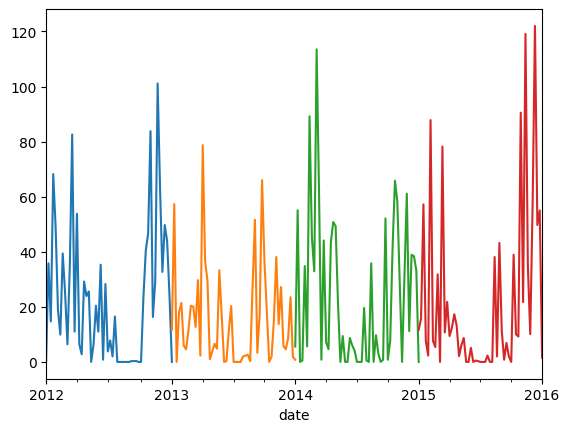

In [ ]:
# 주별 강수량 합 확인
df2012['precipitation'].resample('W').sum().plot()
df2013['precipitation'].resample('W').sum().plot()
df2014['precipitation'].resample('W').sum().plot()
df2015['precipitation'].resample('W').sum().plot()

<Axes: xlabel='date'>

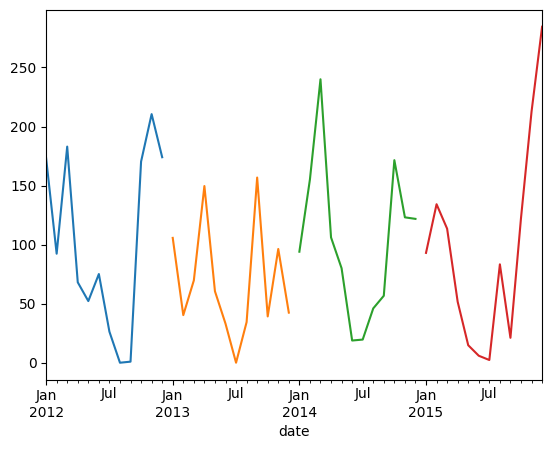

In [ ]:
# 월별 강수량 합 확인
df2012['precipitation'].resample('M').sum().plot()
df2013['precipitation'].resample('M').sum().plot()
df2014['precipitation'].resample('M').sum().plot()
df2015['precipitation'].resample('M').sum().plot()

<Axes: xlabel='date'>

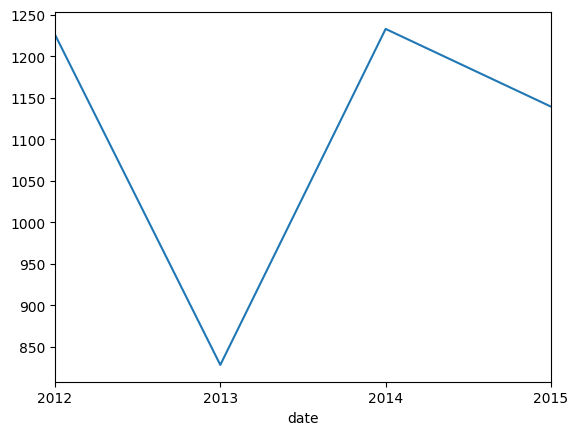

In [ ]:
# 년별 강수량 합 확인
new_df['precipitation'].resample('Y').sum().plot()

## 2. temp_max
- 음수값도 있음!!

(array([ 12.,  61., 218., 266., 263., 207., 193., 139.,  78.,  24.]),
 array([-1.6 ,  2.12,  5.84,  9.56, 13.28, 17.  , 20.72, 24.44, 28.16,
        31.88, 35.6 ]),
 <BarContainer object of 10 artists>)

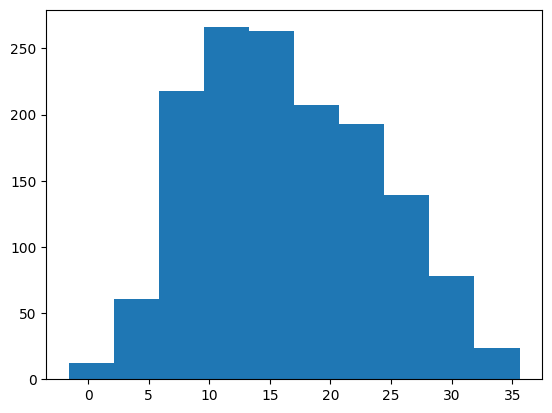

In [ ]:
import matplotlib.pyplot as plt
plt.hist(new_df['temp_max'])

## 3. temp_min
- 음수값도 존재!!

(array([  8.,  30.,  50., 154., 184., 269., 257., 206., 236.,  67.]),
 array([-7.1 , -4.56, -2.02,  0.52,  3.06,  5.6 ,  8.14, 10.68, 13.22,
        15.76, 18.3 ]),
 <BarContainer object of 10 artists>)

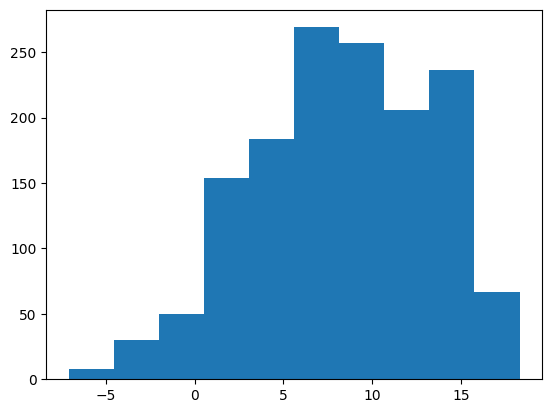

In [ ]:
plt.hist(new_df['temp_min'])

## 4. wind


(array([ 87., 289., 456., 265., 172., 102.,  60.,  18.,   9.,   3.]),
 array([0.4 , 1.31, 2.22, 3.13, 4.04, 4.95, 5.86, 6.77, 7.68, 8.59, 9.5 ]),
 <BarContainer object of 10 artists>)

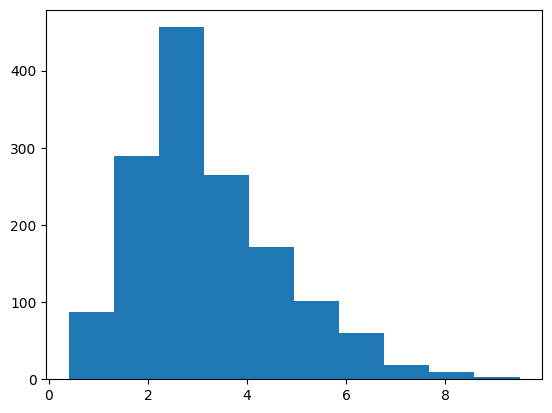

In [ ]:
plt.hist(new_df['wind'])

## 5. weather
- drizzle, fog, sun 일때는 강수량 0
- rain, snow 때만 강수량 존재
- drizzle, fog, sun / rain / snow 로 분리

In [ ]:
new_df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [ ]:
new_df.groupby('weather')['precipitation'].sum()

weather
drizzle       0.0
fog           0.0
rain       4203.6
snow        222.4
sun           0.0
Name: precipitation, dtype: float64

In [ ]:
new_df.groupby('weather')['precipitation'].mean()

weather
drizzle    0.000000
fog        0.000000
rain       6.557878
snow       8.553846
sun        0.000000
Name: precipitation, dtype: float64

# 인코딩
- weather 변수를 인코딩
  - drizzle,fog,sun에 해당되면 dfs 칼럼에 1
  - snow 이면 snow 칼럼에 1
  - rain이면 rain 칼럼에 1

In [ ]:
df['weather_dfs']=0
df['weather_snow']=0
df['weather_rain']=0
for i in range(len(df)):
  if df['weather'][i] == 'snow':
    df['weather_snow'][i]=1
  elif df['weather'][i] == 'rain':
    df['weather_rain'][i]=1
  else :
    df['weather_dfs'][i]=1

In [ ]:
df

,date,temp_max,temp_min,wind,weather,precipitation,year,month,day,new_year,new_month,week,new_week,weather_dfs,weather_snow,weather_rain
0,2012-01-01,12.8,5.0,4.7,drizzle,0.0,2012,01,01,3,7,52,37,1,0,0
1,2012-01-02,10.6,2.8,4.5,rain,10.9,2012,01,02,3,7,1,21,0,0,1
2,2012-01-03,11.7,7.2,2.3,rain,0.8,2012,01,03,3,7,1,21,0,0,1
3,2012-01-04,12.2,5.6,4.7,rain,20.3,2012,01,04,3,7,1,21,0,0,1
4,2012-01-05,8.9,2.8,6.1,rain,1.3,2012,01,05,3,7,1,21,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,4.4,1.7,2.9,rain,8.6,2015,12,27,2,10,52,37,0,0,1
1457,2015-12-28,5.0,1.7,1.3,rain,1.5,2015,12,28,2,10,53,7,0,0,1
1458,2015-12-29,7.2,0.6,2.6,fog,0.0,2015,12,29,2,10,53,7,1,0,0
1459,2015-12-30,5.6,-1.0,3.4,sun,0.0,2015,12,30,2,10,53,7,1,0,0


# 스케일링
- temp_max, temp_min : Standard Scaler
- wind : MinMax Scaler
- new_year, new_month, new_week : MinMax Scaler
- weather_dfs, weather_snow, weather_rain은 pass

In [ ]:
test_df = df[['temp_max','temp_min','wind','precipitation','year','month','week','weather_dfs','weather_snow','weather_rain']]
test_df

,temp_max,temp_min,wind,precipitation,year,month,week,weather_dfs,weather_snow,weather_rain
0,12.8,5.0,4.7,0.0,2012,01,52,1,0,0
1,10.6,2.8,4.5,10.9,2012,01,1,0,0,1
2,11.7,7.2,2.3,0.8,2012,01,1,0,0,1
3,12.2,5.6,4.7,20.3,2012,01,1,0,0,1
4,8.9,2.8,6.1,1.3,2012,01,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1456,4.4,1.7,2.9,8.6,2015,12,52,0,0,1
1457,5.0,1.7,1.3,1.5,2015,12,53,0,0,1
1458,7.2,0.6,2.6,0.0,2015,12,53,1,0,0
1459,5.6,-1.0,3.4,0.0,2015,12,53,1,0,0


In [ ]:
# # Robust Scaler
# import numpy as np
# from sklearn.preprocessing import RobustScaler
# cols = ["temp_max", "temp_min"]
# for col in cols:
#   #2차원 ndarray로 변환
#   items = np.array(df[col]).reshape(-1,1)

#   # 변형 객체 생성
#   robust_scaler = RobustScaler()

#   # 훈련데이터의 모수 분포 저장
#   robust_scaler.fit(items)

#   # 훈련 데이터 스케일링
#   items_scaled = robust_scaler.transform(items)

#   #transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
#   items_df_scaled = pd.DataFrame(data=items_scaled)
#   print('feature들의 최솟값')
#   print(items_df_scaled.min())
#   print('\nfeature들의 최댓값')
#   print(items_df_scaled.max())

#   # 칼럼 추가
#   feat_name = 'Robust_Scale_'+col
#   test_df[feat_name]= items_scaled

In [ ]:
# Standard Scaler
import numpy as np
from sklearn.preprocessing import StandardScaler
cols = ["temp_min",'temp_max']
for col in cols:
  #2차원 ndarray로 변환
  items = np.array(df[col]).reshape(-1,1)

  # 변형 객체 생성
  standard_scaler = StandardScaler()

  # 훈련데이터의 모수 분포 저장
  standard_scaler.fit(items)

  # 훈련 데이터 스케일링
  items_scaled = standard_scaler.transform(items)

  #transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
  items_df_scaled = pd.DataFrame(data=items_scaled)
  print('feature들의 최솟값')
  print(items_df_scaled.min())
  print('\nfeature들의 최댓값')
  print(items_df_scaled.max())

  # 칼럼 추가
  feat_name = 'Standard_Scale_'+col
  test_df[feat_name]= items_scaled

feature들의 최솟값
0   -3.053954
dtype: float64

feature들의 최댓값
0    2.004513
dtype: float64
feature들의 최솟값
0   -2.455218
dtype: float64

feature들의 최댓값
0    2.607906
dtype: float64


In [ ]:
# MinMax Scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
cols = ["new_year",'new_month','new_week','wind', 'precipitation']
for col in cols:
  #2차원 ndarray로 변환
  items = np.array(df[col]).reshape(-1,1)

  # 변형 객체 생성
  minmax_scaler = MinMaxScaler()

  # 훈련데이터의 모수 분포 저장
  minmax_scaler.fit(items)

  # 훈련 데이터 스케일링
  items_scaled = minmax_scaler.transform(items)

  #transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
  items_df_scaled = pd.DataFrame(data=items_scaled)
  print('feature들의 최솟값')
  print(items_df_scaled.min())
  print('\nfeature들의 최댓값')
  print(items_df_scaled.max())

  # 칼럼 추가
  feat_name = 'MinMax_Scale_'+col
  test_df[feat_name]= items_scaled

feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64
feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64
feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64
feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64
feature들의 최솟값
0    0.0
dtype: float64

feature들의 최댓값
0    1.0
dtype: float64


In [ ]:
test_df.columns

Index(['temp_max', 'temp_min', 'wind', 'precipitation', 'year', 'month',
       'week', 'weather_dfs', 'weather_snow', 'weather_rain',
       'Standard_Scale_temp_min', 'Standard_Scale_temp_max',
       'MinMax_Scale_new_year', 'MinMax_Scale_new_month',
       'MinMax_Scale_new_week', 'MinMax_Scale_wind',
       'MinMax_Scale_precipitation'],
      dtype='object')

In [ ]:
test_df.corr()

,temp_max,temp_min,wind,precipitation,weather_dfs,weather_snow,weather_rain,Standard_Scale_temp_min,Standard_Scale_temp_max,MinMax_Scale_new_year,MinMax_Scale_new_month,MinMax_Scale_new_week,MinMax_Scale_wind,MinMax_Scale_precipitation
temp_max,1.000000,0.875687,-0.164857,-0.228555,0.410629,-0.199070,-0.359142,0.875687,1.000000,0.009987,-0.741795,-0.672507,-0.164857,-0.228555
temp_min,0.875687,1.000000,-0.074185,-0.072684,0.170871,-0.216830,-0.113748,1.000000,0.875687,-0.000514,-0.692152,-0.598682,-0.074185,-0.072684
wind,-0.164857,-0.074185,1.000000,0.328045,-0.291838,0.109607,0.263738,-0.074185,-0.164857,0.105501,0.137940,0.173941,1.000000,0.328045
precipitation,-0.228555,-0.072684,0.328045,1.000000,-0.494958,0.111354,0.467160,-0.072684,-0.228555,0.059522,0.240797,0.317125,0.328045,1.000000
weather_dfs,0.410629,0.170871,-0.291838,-0.494958,1.000000,-0.146862,-0.964649,0.170871,0.410629,-0.021234,-0.323897,-0.360149,-0.291838,-0.494958
weather_snow,-0.199070,-0.216830,0.109607,0.111354,-0.146862,1.000000,-0.119010,-0.216830,-0.199070,0.041645,0.100214,0.138651,0.109607,0.111354
weather_rain,-0.359142,-0.113748,0.263738,0.467160,-0.964649,-0.119010,1.000000,-0.113748,-0.359142,0.010219,0.298421,0.324569,0.263738,0.467160
Standard_Scale_temp_min,0.875687,1.000000,-0.074185,-0.072684,0.170871,-0.216830,-0.113748,1.000000,0.875687,-0.000514,-0.692152,-0.598682,-0.074185,-0.072684
Standard_Scale_temp_max,1.000000,0.875687,-0.164857,-0.228555,0.410629,-0.199070,-0.359142,0.875687,1.000000,0.009987,-0.741795,-0.672507,-0.164857,-0.228555
MinMax_Scale_new_year,0.009987,-0.000514,0.105501,0.059522,-0.021234,0.041645,0.010219,-0.000514,0.009987,1.000000,0.000044,0.001341,0.105501,0.059522


In [ ]:
final_df=test_df[[
    'Standard_Scale_temp_min',
                 # 'Standard_Scale_temp_max',
       'MinMax_Scale_new_year',
  #   'MinMax_Scale_new_month',
       'MinMax_Scale_new_week', 'MinMax_Scale_wind',
        'weather_dfs',
    #'weather_snow',
    'weather_rain',
                 'MinMax_Scale_precipitation']]
final_df

,Standard_Scale_temp_min,MinMax_Scale_new_year,MinMax_Scale_new_week,MinMax_Scale_wind,weather_dfs,weather_rain,MinMax_Scale_precipitation
0,-0.644212,0.666667,0.711538,0.472527,1,0,0.000000
1,-1.082347,0.666667,0.403846,0.450549,0,1,0.194991
2,-0.206077,0.666667,0.403846,0.208791,0,1,0.014311
3,-0.524720,0.666667,0.403846,0.472527,0,1,0.363148
4,-1.082347,0.666667,0.403846,0.626374,0,1,0.023256
...,...,...,...,...,...,...,...
1456,-1.301414,0.333333,0.711538,0.274725,0,1,0.153846
1457,-1.301414,0.333333,0.134615,0.098901,0,1,0.026834
1458,-1.520481,0.333333,0.134615,0.241758,1,0,0.000000
1459,-1.839125,0.333333,0.134615,0.329670,1,0,0.000000


# 모델링 코드

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Standard_Scale_temp_min     1461 non-null   float64
 1   MinMax_Scale_new_year       1461 non-null   float64
 2   MinMax_Scale_new_week       1461 non-null   float64
 3   MinMax_Scale_wind           1461 non-null   float64
 4   weather_dfs                 1461 non-null   int64  
 5   weather_rain                1461 non-null   int64  
 6   MinMax_Scale_precipitation  1461 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 80.0 KB


In [ ]:
final_df = final_df.astype({'MinMax_Scale_precipitation':'float'})
final_df

,Standard_Scale_temp_min,MinMax_Scale_new_year,MinMax_Scale_new_week,MinMax_Scale_wind,weather_dfs,weather_rain,MinMax_Scale_precipitation
0,-0.644212,0.666667,0.711538,0.472527,1,0,0.000000
1,-1.082347,0.666667,0.403846,0.450549,0,1,0.194991
2,-0.206077,0.666667,0.403846,0.208791,0,1,0.014311
3,-0.524720,0.666667,0.403846,0.472527,0,1,0.363148
4,-1.082347,0.666667,0.403846,0.626374,0,1,0.023256
...,...,...,...,...,...,...,...
1456,-1.301414,0.333333,0.711538,0.274725,0,1,0.153846
1457,-1.301414,0.333333,0.134615,0.098901,0,1,0.026834
1458,-1.520481,0.333333,0.134615,0.241758,1,0,0.000000
1459,-1.839125,0.333333,0.134615,0.329670,1,0,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('MinMax_Scale_precipitation',axis=1),final_df['MinMax_Scale_precipitation'], test_size=0.4, random_state=1)

- LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [ ]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = linear_reg_model.predict(X_train)
pred_test = linear_reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(y_train, pred))
print(mean_squared_error(y_test, pred_test))

0.009344129653997278
0.010403507836875612
